In [12]:
import numpy as np
import matplotlib.pyplot as plt

from pytorch_utils.eval import read_model
from mix_train import get_training_mappings
from pytorch_utils.eval import flip
from nbutils import (thresh, score_pred, load_img, make_input_tensor,
                     _mini_predict_on_file, get_saliency_big, plot_poly)
from config import Config

import torch, cv2, gdal, georaster
import sys, os, json, math
% matplotlib inline

In [2]:
from dataset.neural_dataset import MixedReadingImageProvider

In [3]:
cfg_f = '../resnet34_1x1080_mixed_RGB.json'
with open(cfg_f, 'r') as f:
    cfg = json.load(f)
    datasets = cfg.pop('datasets')
cfg = Config(**cfg)
model = read_model(cfg, '')

In [4]:
sal_map = False
data_infos = [get_training_mappings(data, sal_map) for data in datasets]
mixed_ip = MixedReadingImageProvider(data_infos)

16 16
16 16
16 16


In [5]:
datasets = mixed_ip.ds_providers

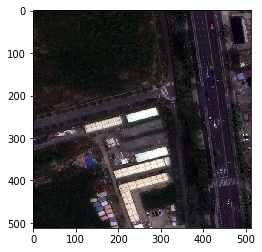

In [6]:
plt.imshow(datasets[1][0].read_image())

In [13]:
out = _mini_predict_on_file(model, datasets[1][0].read_image(), None, channels=3, flips=flip.FLIP_NONE).squeeze()

/home/ngundotra/.conda/envs/gdal/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))
/home/ngundotra/.conda/envs/gdal/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


/home/ngundotra/.conda/envs/gdal/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))
/home/ngundotra/.conda/envs/gdal/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


<Figure size 432x288 with 0 Axes>

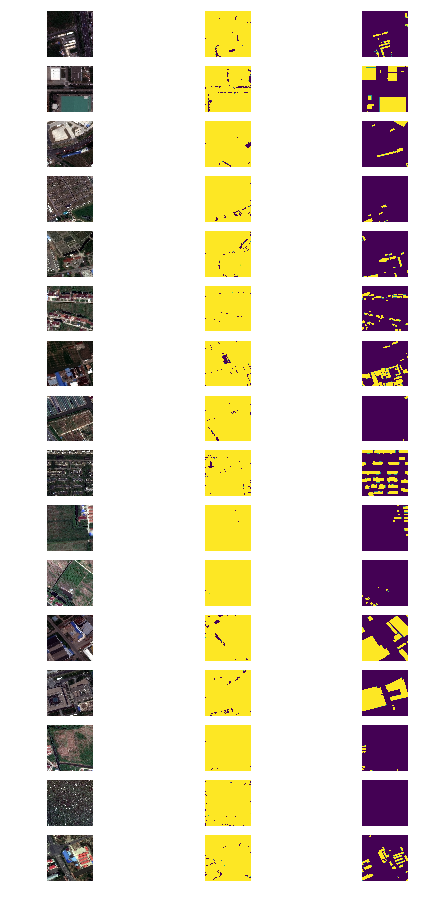

In [9]:
plt.tight_layout()
fig, ax = plt.subplots(figsize=(8, 16), nrows=len(datasets[1]), ncols=3)
for i in range(len(datasets[1])):
    left, mid, right = ax[i]
    [a.axis('off') for a in ax[i]]
    im = datasets[1][i].read_image()
    left.imshow(im)
    mid.imshow(_mini_predict_on_file(model, im, None, channels=3).squeeze())
    right.imshow(datasets[1][i].read_mask().squeeze())
    left.set_ylabel(str(i))
plt.show(fig)

/home/ngundotra/.conda/envs/gdal/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 1. Got 259 and 260 in dimension 2 at /opt/conda/conda-bld/pytorch_1544174967633/work/aten/src/THC/generic/THCTensorMath.cu:83

<Figure size 432x288 with 0 Axes>

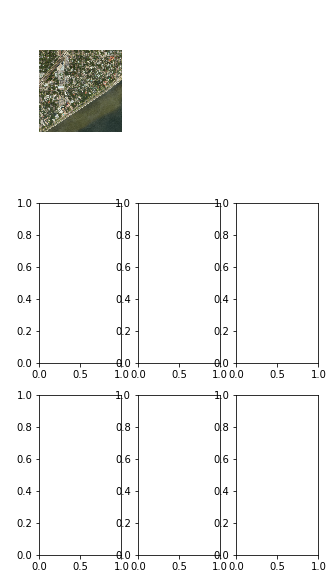

In [33]:
num = 3
ds = datasets[0]
plt.tight_layout()
fig, ax = plt.subplots(figsize=(5, 10), nrows=num, ncols=3)
for i in range(num):
    left, mid, right = ax[i]
    [a.axis('off') for a in ax[i]]
    im = ds[i].read_image()
    left.imshow(im)
#     out = _mini_predict_on_file(model, im, None, channels=3, flips=flip.FLIP_NONE).squeeze()
    with torch.no_grad():
        in_t = torch.Tensor(np.expand_dims(np.transpose(im, (2, 0, 1)), 0)).cuda()
        out = model(in_t).squeeze().cpu().numpy()
        print(out.shape)
        print(score_pred(out, ds[i].read_mask().squeeze()))
    mid.imshow(out)
    right.imshow(ds[i].read_mask().squeeze())
    left.set_ylabel(str(i))
plt.show(fig)